In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import re
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv('laptop_details.csv')
df.head()

,Product,Rating,MRP,Feature
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...


In [6]:
df.shape

(720, 4)

In [7]:
df.columns

Index(['Product', 'Rating', 'MRP', 'Feature'], dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Product  720 non-null    object 
 1   Rating   581 non-null    float64
 2   MRP      720 non-null    object 
 3   Feature  720 non-null    object 
dtypes: float64(1), object(3)
memory usage: 22.6+ KB


In [9]:
df.isnull().sum()

Product      0
Rating     139
MRP          0
Feature      0
dtype: int64

In [10]:
df.duplicated().sum()

297

In [11]:
df['MRP']=df['MRP'].str.replace('₹','')
df['MRP']=df['MRP'].str.replace(',','')
df['MRP'] = df['MRP'].astype('float64')

In [12]:
df.head()

,Product,Rating,MRP,Feature
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,36990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,39990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,32990.0,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,49990.0,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,49990.0,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...


<Axes: xlabel='MRP', ylabel='Count'>

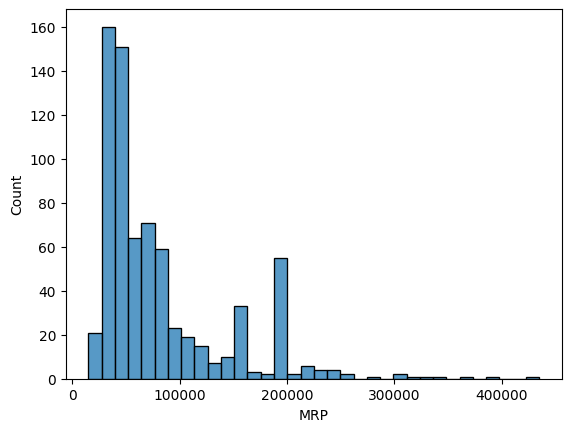

In [13]:
sns.histplot(df['MRP'])

In [14]:
def extract_features(row):
    product = row['Product']
    feature = row['Feature']

    brand = re.findall(r'^\w+', product)
    brand = brand[0] if brand else None
    
    gen = re.findall(r'(?:7th|8th|9th|10th|11th|12th)[\s\w]+Gen', feature)
    gen = gen[0] if gen else 'Undefine'

    os = re.findall(r'(Windows (?:10|11)|Mac OS|Linux|DOS|Chrome)[\s\w]*Operating System', feature)
    os = os[0] if os else None
    
    ram_size = re.findall(r'(\d+) ?(?:GB|TB)', feature)
    ram_size = ram_size[0] + ' GB' if ram_size else None
    
    ram_type = re.findall(r'LPDDR3|LPDDR4X|DDR4|DDR5|RAMMac', feature)
    ram_type = ram_type[0] if ram_type else None
    
    processor = re.findall(r'(?:AMD|Intel|Apple)[\s\w]+(?:Core|Ryzen|Celeron|M1|M2|Pentium|Snapdragon|Athlon)[\s\w]+Processor', feature)
    processor = processor[0] if processor else None
    
    ssd = re.findall(r'[\d]+\s(?:GB|TB)\s(?:SSD)', product)
    ssd = ssd[0] if ssd else 'No SSD'

    hdd = re.findall(r'[\d]+\s(?:GB|TB)\s(?:HDD)', product)
    hdd = hdd[0] if hdd else 'No HDD'
    
    display_cm = re.findall(r'[0-9.]+\s(?:cm)', feature)
    display_cm = display_cm[0] if display_cm else None
    
    return pd.Series([brand, gen, os,  processor, ram_size, ram_type, ssd, hdd, display_cm], 
                     index=['Brand', 'Generation', 'OS', 'Processor', 'RAM_Size', 'RAM_Type', 'SSD', 'HDD', 'Display'])

df[['Brand', 'Generation', 'OS', 'Processor', 'RAM_Size', 'RAM_Type', 'SSD', 'HDD', 'Display']] = df.apply(extract_features, axis=1)


In [15]:
df.head(5)

,Product,Rating,MRP,Feature,Brand,Generation,OS,Processor,RAM_Size,RAM_Type,SSD,HDD,Display
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,36990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,11th Gen,Windows 11,Intel Core i3 Processor,8 GB,DDR4,256 GB SSD,No HDD,35.56 cm
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,39990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,11th Gen,Windows 11,Intel Core i3 Processor,8 GB,DDR4,512 GB SSD,No HDD,39.62 cm
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,32990.0,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,ASUS,10th Gen,Windows 11,Intel Core i3 Processor,8 GB,DDR4,512 GB SSD,No HDD,39.62 cm
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,49990.0,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,HP,Undefine,Windows 10,AMD Ryzen 5 Hexa Core Processor,8 GB,DDR4,512 GB SSD,No HDD,39.62 cm
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,49990.0,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,ASUS,10th Gen,Windows 11,Intel Core i5 Processor,8 GB,DDR4,512 GB SSD,No HDD,39.62 cm


In [17]:
laptopdata = df.drop(['Product', 'Feature', 'Rating'], axis=1)
laptopdata = laptopdata[['Brand', 'OS', 'Generation', 'Processor', 'RAM_Type', 'RAM_Size', 'SSD', 'HDD', 'Display', 'MRP']]


In [18]:
laptopdata.head()

,Brand,OS,Generation,Processor,RAM_Type,RAM_Size,SSD,HDD,Display,MRP
0,Lenovo,Windows 11,11th Gen,Intel Core i3 Processor,DDR4,8 GB,256 GB SSD,No HDD,35.56 cm,36990.0
1,Lenovo,Windows 11,11th Gen,Intel Core i3 Processor,DDR4,8 GB,512 GB SSD,No HDD,39.62 cm,39990.0
2,ASUS,Windows 11,10th Gen,Intel Core i3 Processor,DDR4,8 GB,512 GB SSD,No HDD,39.62 cm,32990.0
3,HP,Windows 10,Undefine,AMD Ryzen 5 Hexa Core Processor,DDR4,8 GB,512 GB SSD,No HDD,39.62 cm,49990.0
4,ASUS,Windows 11,10th Gen,Intel Core i5 Processor,DDR4,8 GB,512 GB SSD,No HDD,39.62 cm,49990.0


In [19]:
laptopdata.isna().sum()

Brand         0
OS            0
Generation    0
Processor     1
RAM_Type      0
RAM_Size      0
SSD           0
HDD           0
Display       0
MRP           0
dtype: int64

In [44]:
laptopdata = laptopdata.dropna(how='any',axis=0)

laptopdata = laptopdata.drop_duplicates()

laptopdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406 entries, 0 to 719
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Brand       406 non-null    object 
 1   OS          406 non-null    object 
 2   Generation  406 non-null    object 
 3   Processor   406 non-null    object 
 4   RAM_Type    406 non-null    object 
 5   RAM_Size    406 non-null    int32  
 6   SSD         406 non-null    int32  
 7   HDD         406 non-null    int32  
 8   Display     406 non-null    float64
 9   MRP         406 non-null    float64
dtypes: float64(2), int32(3), object(5)
memory usage: 30.1+ KB


In [36]:
laptopdata.SSD = laptopdata.SSD.apply(lambda x : x.replace('1 TB SSD', '1024 GB SSD').replace('2 TB SSD', '2048 GB SSD').replace('No SSD', '0 GB SSD'))
laptopdata.SSD = laptopdata.SSD.apply(lambda x : x.replace('GB SSD', '')).astype(int)

In [37]:
laptopdata.HDD = laptopdata.HDD.apply(lambda x : x.replace('1 TB HDD', '1024 GB HDD').replace('No HDD', '0 GB HDD'))
laptopdata.HDD = laptopdata.HDD.apply(lambda x : x.replace('GB HDD', '')).astype(int)

In [39]:
laptopdata.Display = laptopdata.Display.apply(lambda x : x.replace('cm', '')).astype(float)

In [40]:
laptopdata['RAM_Size'] = laptopdata['RAM_Size'].astype('int32')
laptopdata['SSD'] = laptopdata['SSD'].astype('int32')
laptopdata['HDD'] = laptopdata['HDD'].astype('int32')
laptopdata['Display'] = laptopdata['Display'].astype('float64')

In [41]:
laptopdata.columns


Index(['Brand', 'OS', 'Generation', 'Processor', 'RAM_Type', 'RAM_Size', 'SSD',
       'HDD', 'Display', 'MRP'],
      dtype='object')

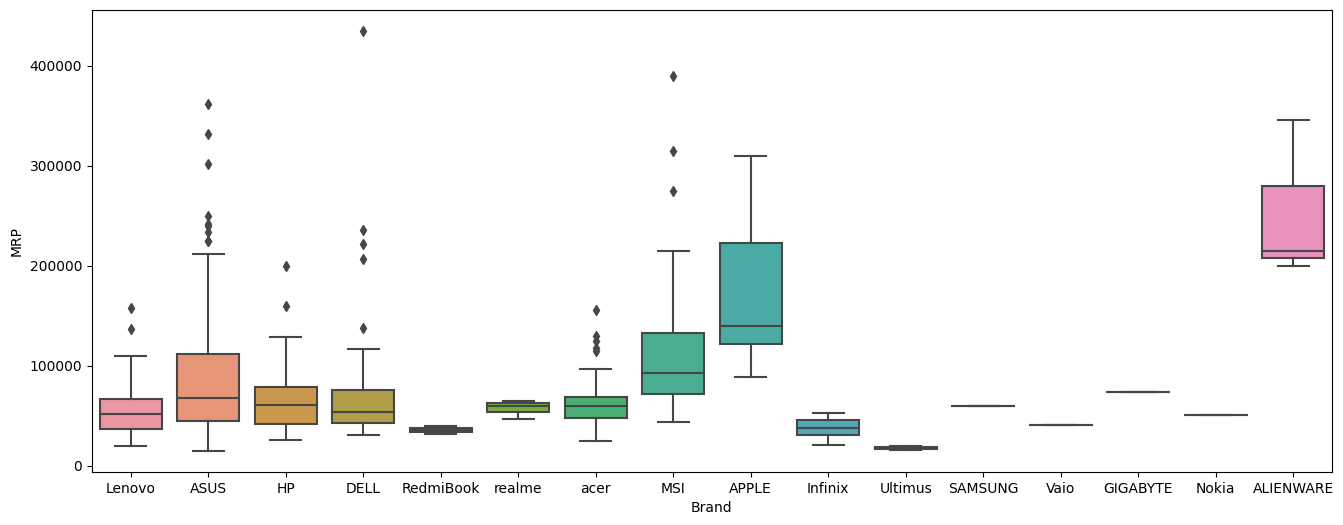

In [42]:
plt.figure(figsize=(16,6))
sns.boxplot(x = laptopdata['Brand'], y = laptopdata['MRP']);

<ipython-input-43-cb20c059ac12>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(laptopdata.corr(), annot = True, cmap='YlGnBu', linewidth=.5)


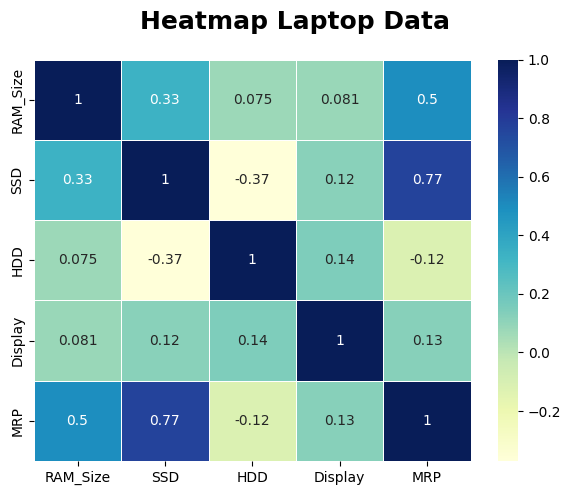

In [43]:
fig = plt.figure(figsize=(6,5))

sns.heatmap(laptopdata.corr(), annot = True, cmap='YlGnBu', linewidth=.5)
fig.suptitle('Heatmap Laptop Data',fontsize=18, fontweight="bold")
fig.tight_layout()
plt.show()

In [45]:
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, KFold

from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [49]:
laptop_data1 = laptopdata.drop(['Brand'], axis=1)

In [50]:
def encoding(feature):
    laptop_data1[feature+'_Encoded'] = LabelEncoder().fit_transform(laptop_data1[feature])
features = ['OS', 'Generation', 'Processor', 'RAM_Type']

In [51]:
for i in features: encoding(i)

In [52]:
laptop_data1.columns

Index(['OS', 'Generation', 'Processor', 'RAM_Type', 'RAM_Size', 'SSD', 'HDD',
       'Display', 'MRP', 'OS_Encoded', 'Generation_Encoded',
       'Processor_Encoded', 'RAM_Type_Encoded'],
      dtype='object')

In [58]:
laptopmodel = laptop_data1[['OS_Encoded', 'Generation_Encoded', 'Processor_Encoded',
                            'RAM_Type_Encoded', 'RAM_Size', 'SSD', 'HDD', 'Display', 'MRP']]

In [59]:
X = laptopmodel.drop('MRP',axis=1)
y = laptopmodel['MRP'].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=20)

In [60]:
X_train.shape

(324, 8)

In [61]:
X_test.shape

(82, 8)

In [62]:
lin = LinearRegression()
lin.fit(X_train,y_train)

LinearRegression()

In [63]:
lin.score(X_test,y_test)

0.596620223125037

In [64]:
y_pred_lin = lin.predict(X_test)

print('R2 score            :',r2_score(y_pred_lin,y_test))
print('MA Percentage Error :',mean_absolute_percentage_error(y_pred_lin,y_test))

R2 score            : 0.08220603520950698
MA Percentage Error : 0.33463647504770005


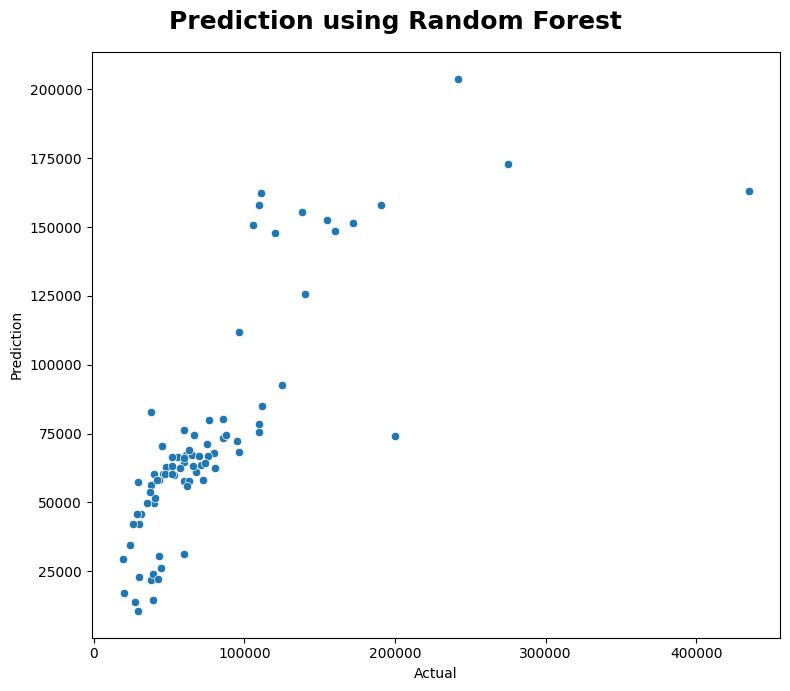

In [66]:
fig = plt.figure(figsize=(8,7))

sns.scatterplot(x=y_test,y=y_pred_lin)
fig.suptitle('Prediction using Random Forest', fontsize= 18 , fontweight='bold')
plt.xlabel("Actual")
plt.ylabel("Prediction")

fig.tight_layout()
fig.subplots_adjust(top=0.92)
plt.show()